In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
import warnings 
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')
np.random.seed(42)

In [3]:
# ! pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df_orig = pd.read_csv('marketing_campaign.csv')
df_orig.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


### DATA CLEANING & FEATURE ENGINEERING

In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
## Income column has 4 null values
## Dt_Customer is of type object and not parsed in datetime


In [7]:
df_orig.dropna(inplace=True)

In [8]:
len(df_orig)

2216

#### Resolving the Dt_Customer column

In [9]:
df_orig['Dt_Customer']
## changing the date to usable format by counting number of days passed

0       2012-09-04
1       2014-03-08
2       2013-08-21
3       2014-02-10
4       2014-01-19
           ...    
2235    2013-06-13
2236    2014-06-10
2237    2014-01-25
2238    2014-01-24
2239    2012-10-15
Name: Dt_Customer, Length: 2216, dtype: object

In [10]:
dates = []
df_orig['Dt_Customer'] =  pd.to_datetime(df_orig['Dt_Customer'])

for cols in df_orig.Dt_Customer:
    upd_date = cols.date()
    dates.append(upd_date)
# taking the max and min from the entire data column will give most recent and older records 
max_date = max(dates)
min_date = min(dates)
max_date,min_date

(datetime.date(2014, 6, 29), datetime.date(2012, 7, 30))

#### Feature Engineering the column which will give the number of days a customer has been a member

In [11]:
days_mem = []

for days in dates:
    days_member = max_date - days
    days_mem.append(days_member)
    
df_orig['Num_days_member'] = days_mem

In [12]:
df_orig['Num_days_member'] = df_orig['Num_days_member'].astype(str).str.extract(r'(\d+)').fillna('0').astype(int)
# df_orig['Num_days_member'] = df_orig['Num_days_member'].astype(str).str.extract(r'(\d+.\d+)').fillna('0').astype(float)

In [13]:
df_orig.head()
# df_orig.info()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num_days_member
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,161


In [14]:
df_orig.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [15]:
df_orig.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

#### Other column manipulations 
- Find age and keep that as a column seperate
- Create a feature IsParent (Boolean) which will convey the parenthood status
- Total Children column
- Living with? Extract from Marital Status
- Converge lesser value counts in Education Column
- Create a column with Total_spent indicatting total money spent by customers over two years in various categories


### Feature Engineering

In [16]:
## Adding the column with age of customers
df_orig['Age'] = 2022-df_orig['Year_Birth']
df_orig

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num_days_member,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,663,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,113,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,312,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,139,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,161,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,381,55
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,19,76
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,155,41
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,156,66


In [17]:
### Total spendings done on various items
df_orig['Spent'] = df_orig['MntWines'] + df_orig['MntFruits'] + df_orig['MntMeatProducts'] + df_orig['MntFishProducts'] + df_orig['MntSweetProducts']+df_orig['MntGoldProds']

In [18]:
## Deriving living situation as 'Alone' or 'Together'
### This will reduce the feature space by reducing number of classes and helps improve overall performance
df_orig['Living_with'] = df_orig['Marital_Status'].replace({
    'Married':'Partner','Together':'Partner','Absurd':'Alone',
    'Divorced':'Alone','Widow':'Alone','YOLO':'Alone','Single':'Alone'
})
df_orig[['Living_with','Marital_Status']]

,Living_with,Marital_Status
0,Alone,Single
1,Alone,Single
2,Partner,Together
3,Partner,Together
4,Partner,Married
...,...,...
2235,Partner,Married
2236,Partner,Together
2237,Alone,Divorced
2238,Partner,Together


In [19]:
df_orig['Living_with'].value_counts() ## we have a 66% and 33% split between two classes as opposed to earlier

Partner    1430
Alone       786
Name: Living_with, dtype: int64

In [20]:
df_orig['Marital_Status'].value_counts() ## Imbalance throughout 

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
### Making a column with total number of children i.e., kids+teens
df_orig['Total Children'] = df_orig['Kidhome']+df_orig['Teenhome']

In [22]:
### Isparent Feature added
df_orig['IsParent'] = np.where(df_orig['Total Children'] >=1, 1, 0)
# df_orig['IsParent'] = np.where(df_orig['Total Children'] >=1, True value, ELSE value)

In [23]:
### Total Family Size
df_orig['Family_Size'] = df_orig['Total Children'] + np.where(df_orig['Living_with']=='Alone',1,2)
df_orig

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Num_days_member,Age,Spent,Living_with,Total Children,IsParent,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,663,65,1617,Alone,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,113,68,27,Alone,2,1,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,312,57,776,Partner,0,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,139,38,53,Partner,1,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,161,41,422,Partner,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,11,0,381,55,1341,Partner,1,1,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,3,11,0,19,76,444,Partner,3,1,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,11,0,155,41,1241,Alone,0,0,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,11,0,156,66,843,Partner,1,1,3


In [24]:
df_orig['Education'] = df_orig['Education'].replace({
    'Graduation':'Graduate','PhD':'Postgraduate','Master':'Postgraduate','2n Cycle':'Undergraduate','Basic':'Undergraduate'
})

In [25]:
## Dropping the redundant and unnecessary columns
df_orig.drop(['Marital_Status','Dt_Customer','Z_CostContact','Z_Revenue','Year_Birth','ID'],axis=1,inplace=True)

In [26]:
df_orig.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Num_days_member,Age,Spent,Living_with,Total Children,IsParent,Family_Size
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,663,65,1617,Alone,0,0,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,113,68,27,Alone,2,1,3
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,312,57,776,Partner,0,0,2
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,139,38,53,Partner,1,1,3
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,161,41,422,Partner,1,1,3


#### Feature Engineering Completed

#### Dataset updated values and distribution

In [27]:
df_orig.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Num_days_member,Age,Spent,Total Children,IsParent,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,353.521209,53.179603,607.075361,0.947202,0.714350,2.592509
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,602.900476,0.749062,0.451825,0.905722
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,0.000000,0.000000,1.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,45.000000,69.000000,0.000000,0.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,355.500000,52.000000,396.500000,1.000000,1.000000,3.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,63.000000,1048.000000,1.000000,1.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,129.000000,2525.000000,3.000000,1.000000,5.000000


In [28]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [29]:
## Setting matplot lib canvas and colorpallet

In [30]:
sns.set(rc={'axes.facecolor':'#FFF9ED','figure.facecolor':'FFF9ED'})
pallet = ['#682F2F','#9E726F','#D6B2B1','#B9C0C9','#9F8A78','#F3AB60']
cmap = colors.ListedColormap(['#682F2F','#9E726F','#D6B2B1','#B9C0C9','#9F8A78','#F3AB60'])

<Figure size 576x396 with 0 Axes>

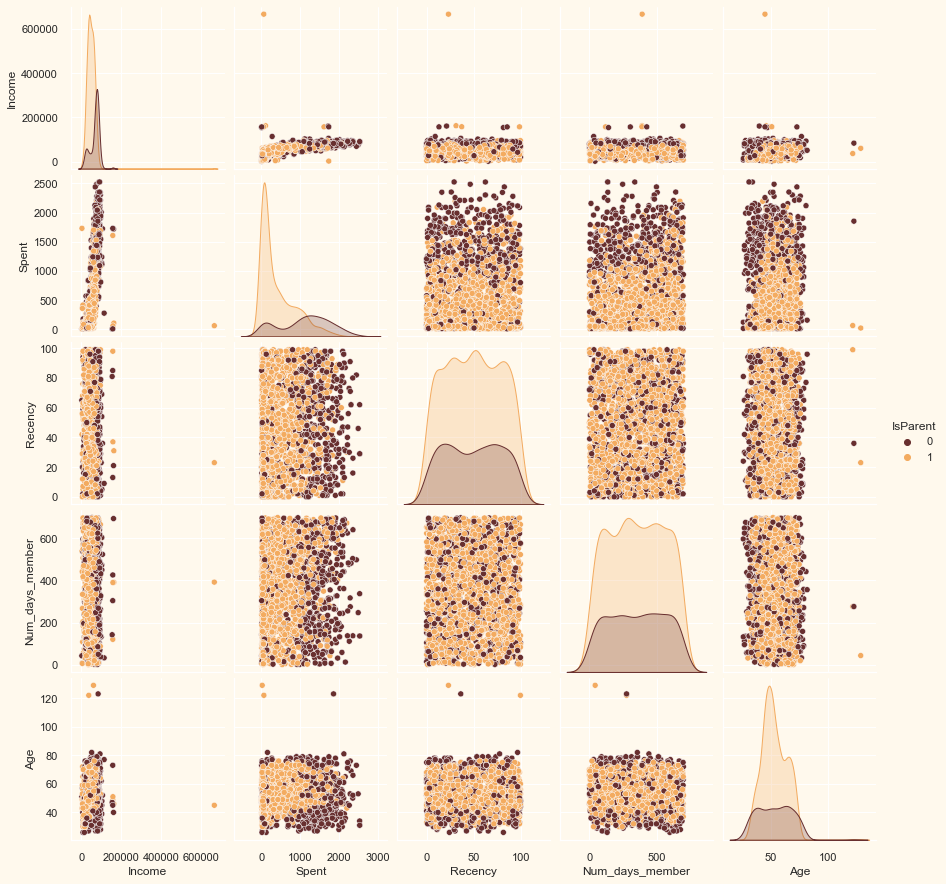

In [31]:
## Plotting new columns after feature engineering
cols_plot = ['Income','Spent','Recency','Num_days_member','Age','IsParent']
plt.figure()
sns.pairplot(df_orig[cols_plot],hue='IsParent',palette = (['#682F2F','#F3AB60']))
# sns.pairplot(df_orig[cols_plot],hue='Spent')
plt.show()

In [32]:
##Dealing and removing the Outliers 

In [33]:
quart1 = df_orig['Age'].quantile(0.25)
quart3 = df_orig['Age'].quantile(0.75)
iqr = quart3-quart1
lower_lim = quart1 - 1.5*iqr
upper_lim = quart3 + iqr*1.5
print(lower_lim,upper_lim)

18.0 90.0


In [34]:
df_orig_upd = df_orig[~((df_orig['Age']>upper_lim) | (df_orig['Age']<lower_lim))].copy() 
#Removing the outliers 
len(df_orig),len(df_orig_upd)
#Removed total of 3 outliers wrt age

(2216, 2213)

In [35]:
### Repeating the process for Income
quart1_inc = df_orig_upd['Income'].quantile(0.25)
quart3_inc = df_orig_upd['Income'].quantile(0.75)
iqr_inc = quart3_inc - quart1_inc
lower_lim_inc = quart1_inc - 1.5*iqr_inc
if lower_lim_inc < 0:
    lower_lim_inc = 0

# upper_lim_inc = quart3_inc + iqr_inc*1.5
upper_lim_inc = 200000 #Manually set as only outlier is 666,666
print(lower_lim_inc,upper_lim_inc)

0 200000


In [36]:
df_orig_upd[(df_orig_upd['Income']>upper_lim_inc)|(df_orig_upd['Income']<lower_lim_inc)]

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Num_days_member,Age,Spent,Living_with,Total Children,IsParent,Family_Size
2233,Graduate,666666.0,1,0,23,9,14,18,8,1,...,0,0,0,392,45,62,Partner,1,1,3


In [37]:
df_orig_upd = df_orig_upd[~((df_orig_upd['Income']>upper_lim_inc)|(df_orig_upd['Income']<lower_lim_inc))].copy()
len(df_orig_upd)

2212

#### Done removing all the outliers

### Correlation Map 

<AxesSubplot:>

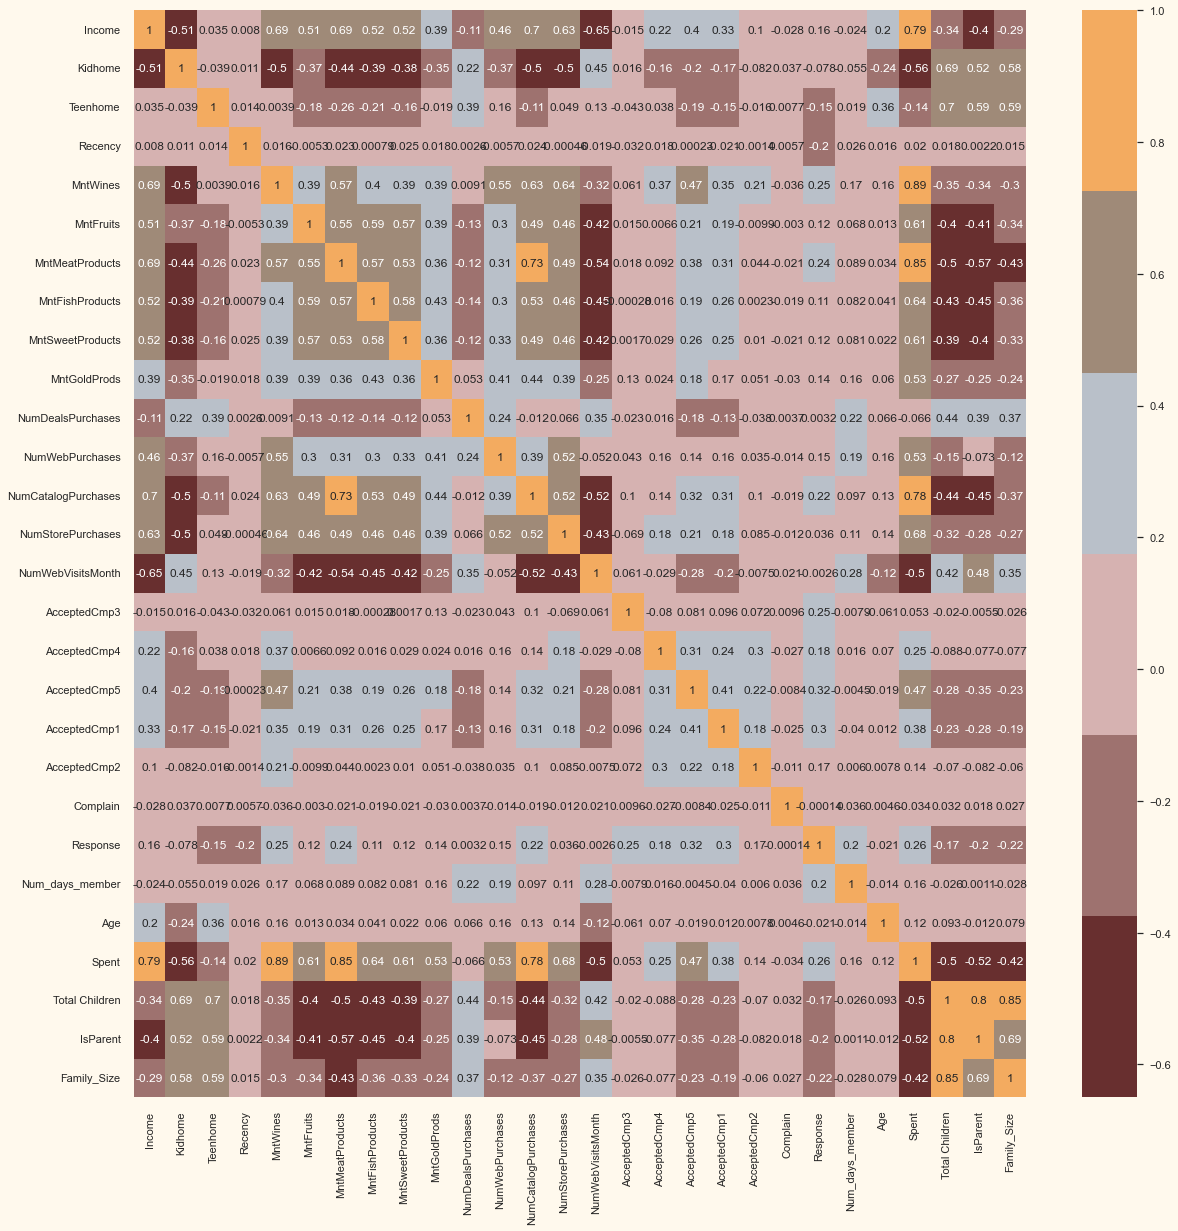

In [38]:
corr_mat = df_orig_upd.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot=True, cmap=cmap)

#### Interesting findings
- Income and Spent have high positive Correlation
- MntWines, MntMeatProducts,NumCatalogPurchase have high positive correlation with SPENT
- FAmily Size and Total Children have high correlation

- Negative Correlation Spent vs Total_children, Family_Size and IsParent
- 

### Data Preprocessing and Label Encoding

- Encoding all the Categorical Features
- Scaling/Normalization
- NEW (Create subset of dataframe. Try Dimensionality reduction using PCA)

In [39]:
## List of categorical variables
cols_obj_tmp = (df_orig_upd.dtypes == 'object')
cols_obj = list(cols_obj_tmp[cols_obj_tmp].index)
cols_obj

['Education', 'Living_with']

In [40]:
le_edu = LabelEncoder()
le_liv = LabelEncoder()


In [41]:
df_orig_upd.Education = le_edu.fit_transform(df_orig_upd.Education)
df_orig_upd.Living_with = le_liv.fit_transform(df_orig_upd.Living_with)

In [42]:
### Scaling the data columns
scaler = StandardScaler()

df_copy = df_orig_upd.copy()
remove_col_list = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']
df_copy.drop(remove_col_list,axis=1,inplace=True)

scaler.fit(df_copy)
scaled_dataset = pd.DataFrame(scaler.transform(df_copy), columns = df_copy.columns)
## ALL features scaled
scaled_dataset

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Num_days_member,Age,Spent,Living_with,Total Children,IsParent,Family_Size
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.581139,-1.758359
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.632456,0.449070
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-1.581139,-0.654644
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.632456,0.449070
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.632456,0.449070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,0.111982,-0.555814,-0.132545,0.134778,0.163575,1.218061,0.740959,0.069987,0.632456,0.449070
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,-0.229679,-0.248141,0.692181,-1.653326,1.958607,-0.271040,0.740959,2.739158,0.632456,2.656499
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,0.111982,2.213242,0.279818,-0.981552,-1.033114,1.052052,-1.349603,-1.264598,-1.581139,-1.758359
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,0.795303,1.290224,-0.957271,-0.976612,1.103830,0.391336,0.740959,0.069987,0.632456,0.449070


### Dimensionality Reduction using PCA


In [43]:
pca = PCA(n_components=3)
# pca.fit(scaled_dataset)
###
# Using PCA reducing the number of features to 3 and checking performance
###
pca_ds = pd.DataFrame(pca.fit_transform(scaled_dataset),columns=(['col1','col2','col3']))
pca_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,9.174899e-17,2.878602,-5.978102,-2.539468,-0.781597,2.386377,7.452929
col2,2212.0,1.097173e-16,1.709469,-4.194805,-1.323933,-0.173673,1.235336,6.168081
col3,2212.0,1.663829e-17,1.231684,-3.623883,-0.853906,-0.051553,0.865200,6.737589


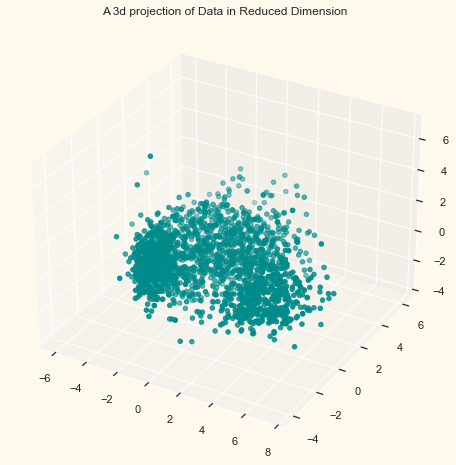

In [44]:
x = pca_ds['col1']
y = pca_ds['col2']
z = pca_ds['col3']

# To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c='darkcyan',marker='o')
ax.set_title('A 3d projection of Data in Reduced Dimension')
plt.show()

Elbow Method Visualized to determine number of clusters


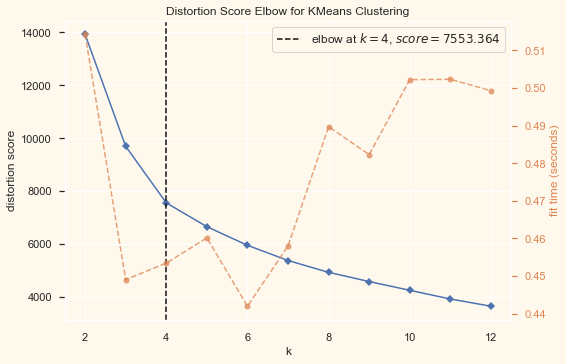

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
### To the reduced dimensions, I will now use agglomerative clustering.
### Aglomerative Clustering (merges examples unitl desired clusters obtained)

# To find number of clusters, I will use the elbow method 
print('Elbow Method Visualized to determine number of clusters')

elbow = KElbowVisualizer(KMeans(),k=12)
elbow.fit(pca_ds)
elbow.show()

In [46]:
# K=4 can be seen as the optimal point with a good balance between the distortion and time taken

In [47]:
## Fit the agglomerative clustering model
clust_aggl = AgglomerativeClustering(n_clusters=4)
# fit the model
y_pred = clust_aggl.fit_predict(pca_ds)
pca_ds['Clusters'] = y_pred

## Added the predictions to the original dataset
df_orig_upd['Clusters'] = y_pred

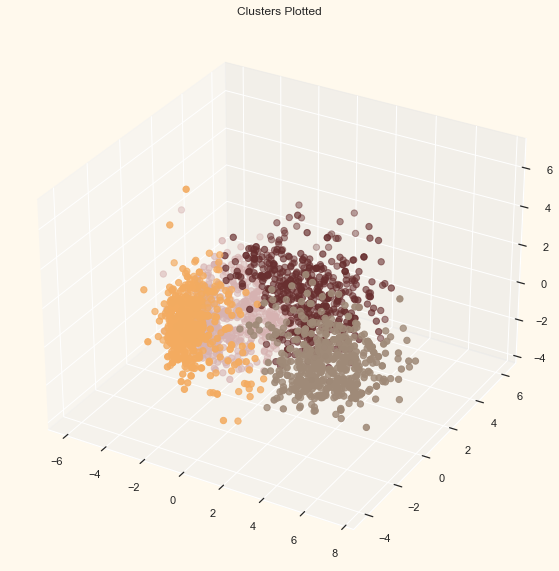

In [48]:
## Plotting the Clusters
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d',label='points')
ax.scatter(x,y,z,s=40,c=pca_ds['Clusters'],marker='o',cmap=cmap)
ax.set_title('Clusters Plotted')
plt.show()

#### Evaluating models
- Since this is unsupervised learning model, there is no right or wrong target answer. The clustering helps get an overview of the entire distribution and the points with similar features are kept together.
- To understand relationships from clusters, I will do EDA (Exploratory Data Analysis)


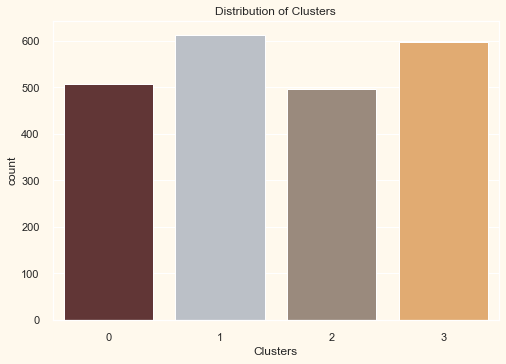

In [49]:
col_pal = ['#682F2F','#B9C0C9','#9F8A78','#F3AB60']
pl = sns.countplot(x = df_orig_upd['Clusters'], palette=col_pal)
pl.set_title('Distribution of Clusters')
plt.show()

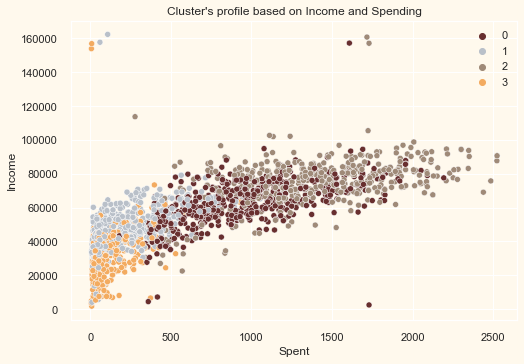

In [50]:
pl2 = sns.scatterplot(data = df_orig_upd, 
                     x = df_orig_upd['Spent'], y=df_orig_upd['Income'],
                     hue = df_orig_upd['Clusters'], palette=col_pal)
pl2.set_title("Cluster's profile based on Income and Spending")
plt.legend()
plt.show()

In [51]:
###
# Group 0 -> High Income Moderate Spent
# Group 1 -> High Income Low Spent
# Group 2 -> High Income High Spent
# Group 3 -> Low Income Low Spent
###

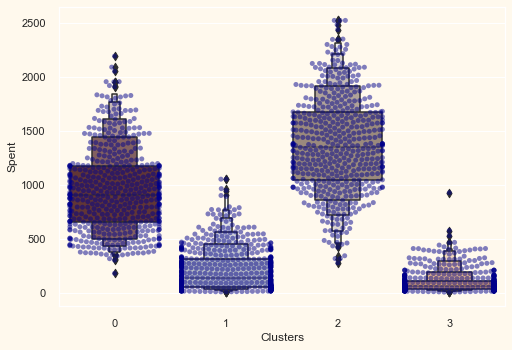

In [52]:
plt.figure()
pl3 = sns.swarmplot(x=df_orig_upd['Clusters'],
                   y=df_orig_upd['Spent'], color='darkblue',
                   alpha=0.5)

pl3 = sns.boxenplot(x=df_orig_upd['Clusters'],
                   y=df_orig_upd['Spent'], palette=col_pal)
plt.show()

In [53]:
### Total Compensation feature added
## Total compensation = Sum of all the promotions and coupons
df_orig_upd['Promotions_Total'] = df_orig_upd['AcceptedCmp1']+df_orig_upd['AcceptedCmp2']+df_orig_upd['AcceptedCmp3']+df_orig_upd['AcceptedCmp4']+df_orig_upd['AcceptedCmp5']

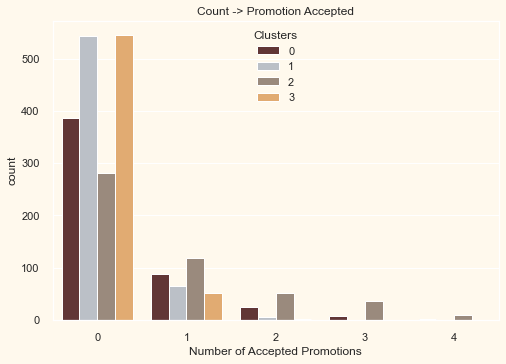

In [56]:
##Plotting the Total Promotion 
plt.figure()

pl4 = sns.countplot(x=df_orig_upd['Promotions_Total'],hue=df_orig_upd['Clusters'],palette=col_pal)
pl4.set_title('Count -> Promotion Accepted')
pl4.set_xlabel('Number of Accepted Promotions')
plt.show()

#####
- Except Cluster 2, mostly people didn't look and accept all the promotions
- Not all the promotions are taken/recieved equally as the total number of accepted promotions fell a lot. Therefore to improve the results, more targeted promotion must be made to make sure most of the promotions are recieved well


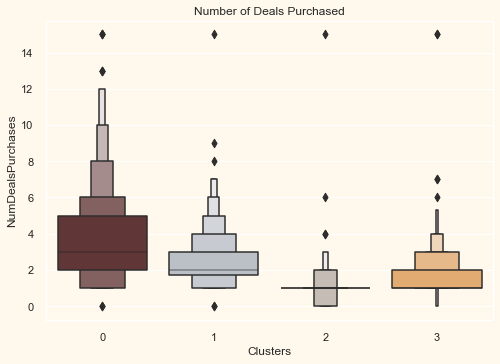

In [60]:
### Plotting the number of deals purchased using boxenplots
pl5 = sns.boxenplot(y=df_orig_upd['NumDealsPurchases'], x=df_orig_upd['Clusters'],palette=col_pal)
pl5.set_title('Number of Deals Purchased')
# pl5.legend()
plt.show()

- Here we can see that all clusters worked well for the number of deals purchased 
- The overall performance is much better than that of number of accepted promotions
- Most deals are taken into consideration by the Cluster 0 and least deals were taken from people in cluster 3


### Clusters and Profiling


##### We have to see what features correspond to each individual cluster, i.e., looking details what each cluster profiled person looks like
- This identification of features is called customer profiling
- Profiling can help in identifying the best customers and the customers who need to be payed attention to
- This will also help in introducing various techniques to maximize profits


<Figure size 576x396 with 0 Axes>

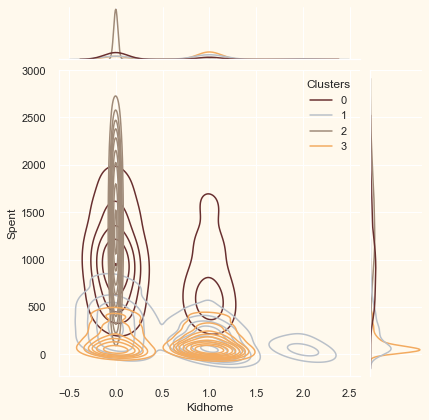

<Figure size 576x396 with 0 Axes>

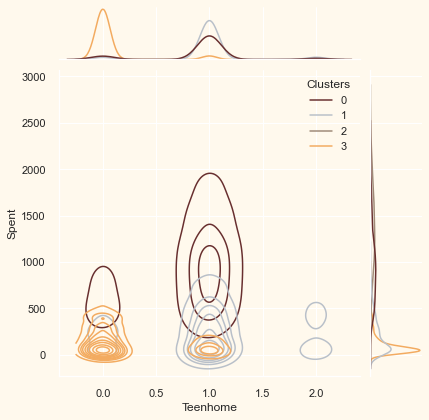

<Figure size 576x396 with 0 Axes>

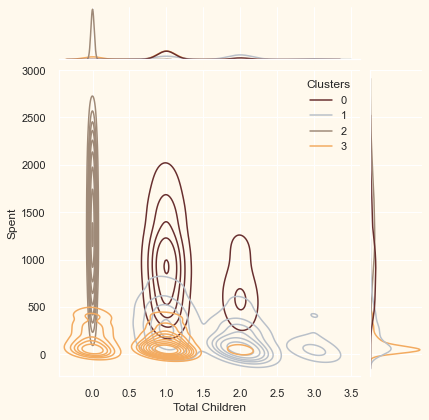

<Figure size 576x396 with 0 Axes>

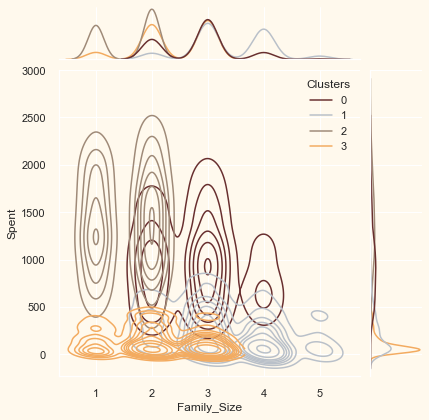

<Figure size 576x396 with 0 Axes>

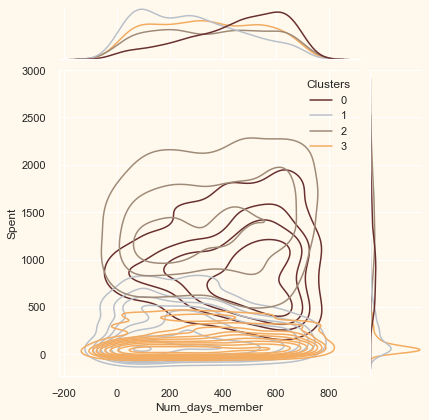

<Figure size 576x396 with 0 Axes>

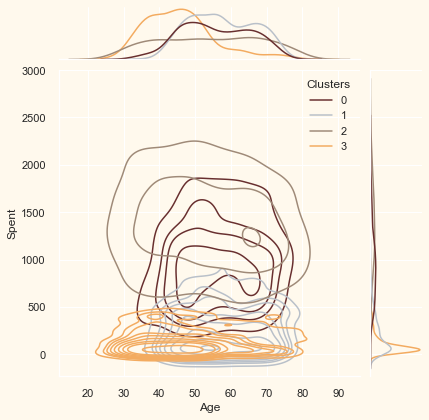

<Figure size 576x396 with 0 Axes>

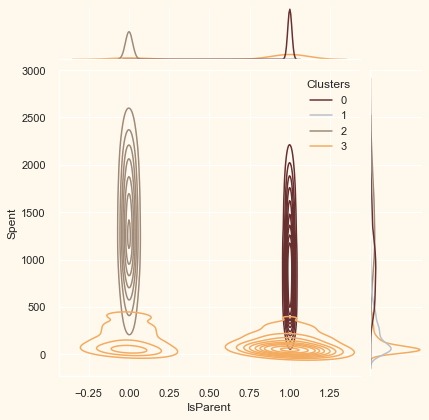

<Figure size 576x396 with 0 Axes>

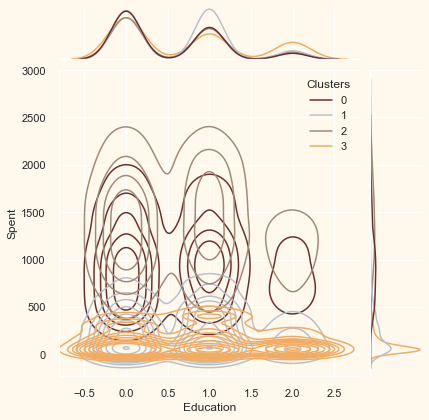

<Figure size 576x396 with 0 Axes>

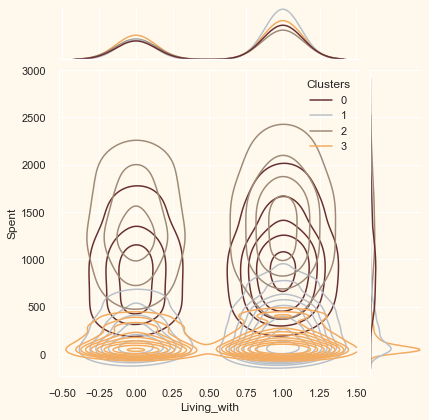

In [62]:
personal_data = ['Kidhome','Teenhome','Total Children','Family_Size','Num_days_member',
                            'Age','IsParent','Education','Living_with']

for attributes in personal_data:
    plt.figure()
    sns.jointplot(x=df_orig_upd[attributes],y=df_orig_upd['Spent'], hue=df_orig_upd['Clusters'],
                 kind='kde',palette=col_pal)
    plt.show()

<Figure size 576x396 with 0 Axes>

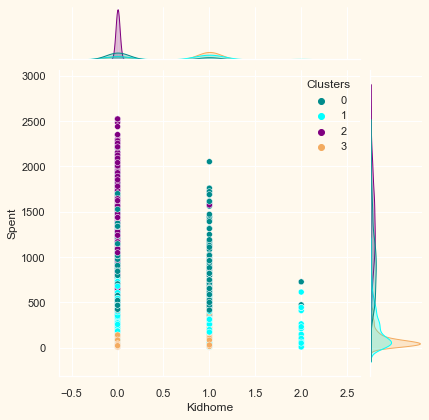

<Figure size 576x396 with 0 Axes>

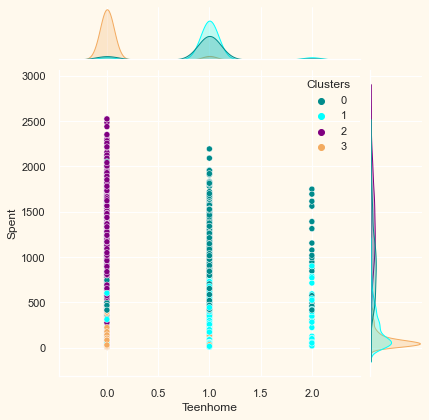

<Figure size 576x396 with 0 Axes>

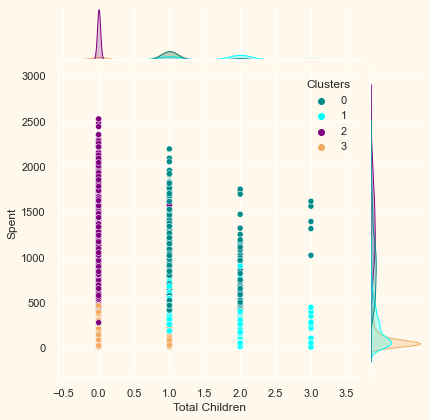

<Figure size 576x396 with 0 Axes>

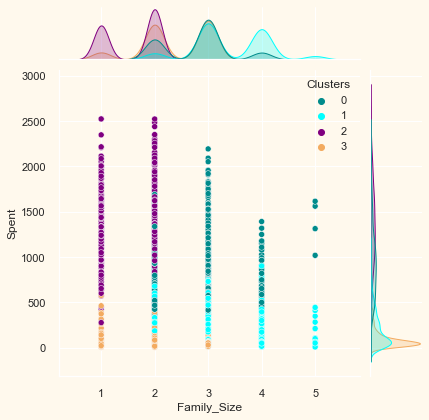

<Figure size 576x396 with 0 Axes>

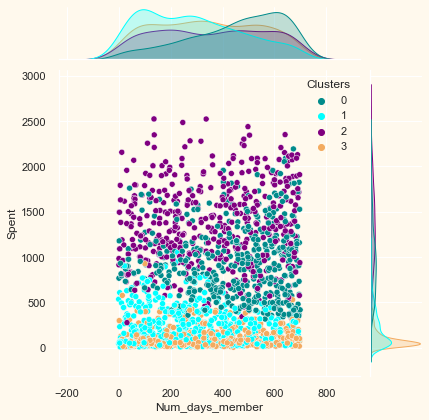

<Figure size 576x396 with 0 Axes>

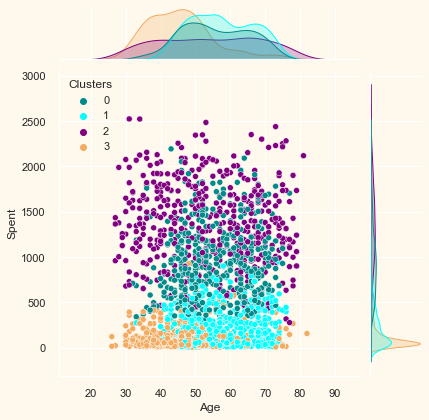

<Figure size 576x396 with 0 Axes>

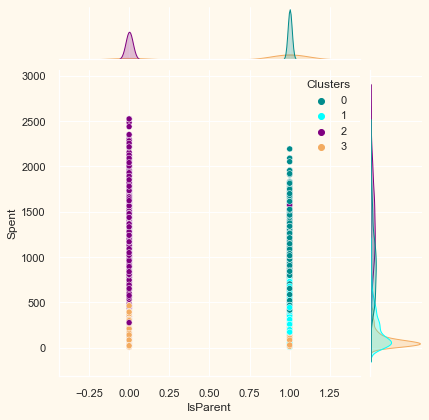

<Figure size 576x396 with 0 Axes>

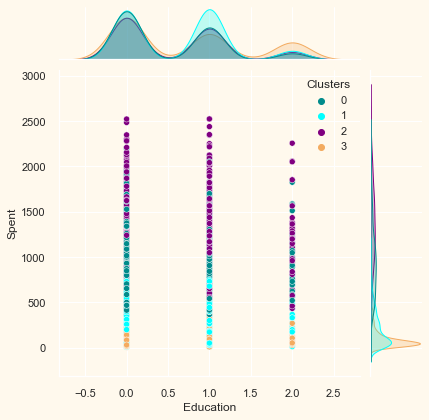

<Figure size 576x396 with 0 Axes>

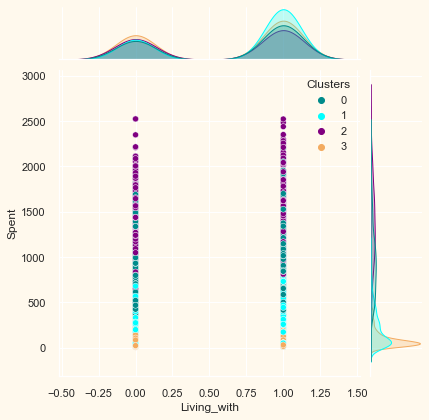

In [66]:
personal_data = ['Kidhome','Teenhome','Total Children','Family_Size','Num_days_member',
                            'Age','IsParent','Education','Living_with']
col_pal2 = ['darkcyan','cyan','purple','#F3AB60']
for attributes in personal_data:
    plt.figure()
    sns.jointplot(x=df_orig_upd[attributes],y=df_orig_upd['Spent'], hue=df_orig_upd['Clusters'],palette=col_pal2)
    plt.show()

#### Cluster 0




#### Cluster 1




#### Cluster 2




#### Cluster 3